In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

In [12]:
df = pd.read_excel('./pwt100.xlsx', sheet_name = 'Data')

In [13]:
df = df[df['country'] == 'United Kingdom']
df = df[['year', 'rgdpna', 'rnna',  'emp']]

In [14]:
df = df.reset_index(drop=True)
df.head()

,year,rgdpna,rnna,emp
0,1950,608973.1250,2162772.25,23.207903
1,1951,634964.1250,2307417.25,23.553173
2,1952,639937.0000,2397405.75,23.540199
3,1953,669456.3125,2506864.00,23.652960
4,1954,689354.3750,2620023.50,23.987253


In [15]:
df.head()

,year,rgdpna,rnna,emp
0,1950,608973.1250,2162772.25,23.207903
1,1951,634964.1250,2307417.25,23.553173
2,1952,639937.0000,2397405.75,23.540199
3,1953,669456.3125,2506864.00,23.652960
4,1954,689354.3750,2620023.50,23.987253


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
year      70 non-null int64
rgdpna    70 non-null float64
rnna      70 non-null float64
emp       70 non-null float64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


In [16]:
df = df.dropna()

In [17]:
df.describe()

,year,rgdpna,rnna,emp
count,70.000000,7.000000e+01,7.000000e+01,70.000000
mean,1984.500000,1.608782e+06,8.373664e+06,26.283842
std,20.351085,7.474313e+05,4.011983e+06,2.544082
min,1950.000000,6.089731e+05,2.162772e+06,23.207903
25%,1967.250000,9.658195e+05,4.889626e+06,24.498785
50%,1984.500000,1.400834e+06,7.962626e+06,25.119679
75%,2001.750000,2.291180e+06,1.180292e+07,27.751639
max,2019.000000,3.015784e+06,1.537446e+07,32.982498


In [ ]:
# Use log of GDP

In [18]:
df['rgdpna_log'] = np.log(df['rgdpna']) 

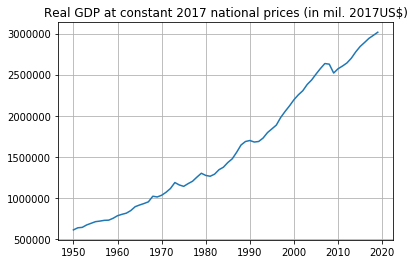

In [19]:
plt.plot(df.year, df.rgdpna, label='GDP')
plt.title('Real GDP at constant 2017 national prices (in mil. 2017US$)')
plt.grid()
plt.show()

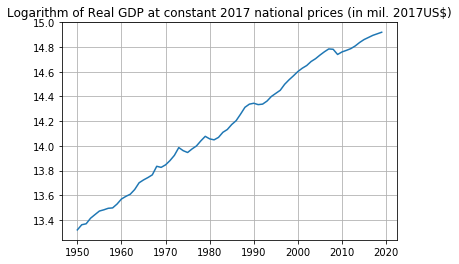

In [20]:
plt.plot(df.year, df.rgdpna_log, label='GDP')
plt.title('Logarithm of Real GDP at constant 2017 national prices (in mil. 2017US$)')
plt.grid()
plt.show()

## Hodrick-Prescott Filter

In [21]:
gdp_cycle_HP, gdp_trend_HP = sm.tsa.filters.hpfilter(df.rgdpna_log, 98)
gap_HP = (df.rgdpna_log - gdp_trend_HP)*100  

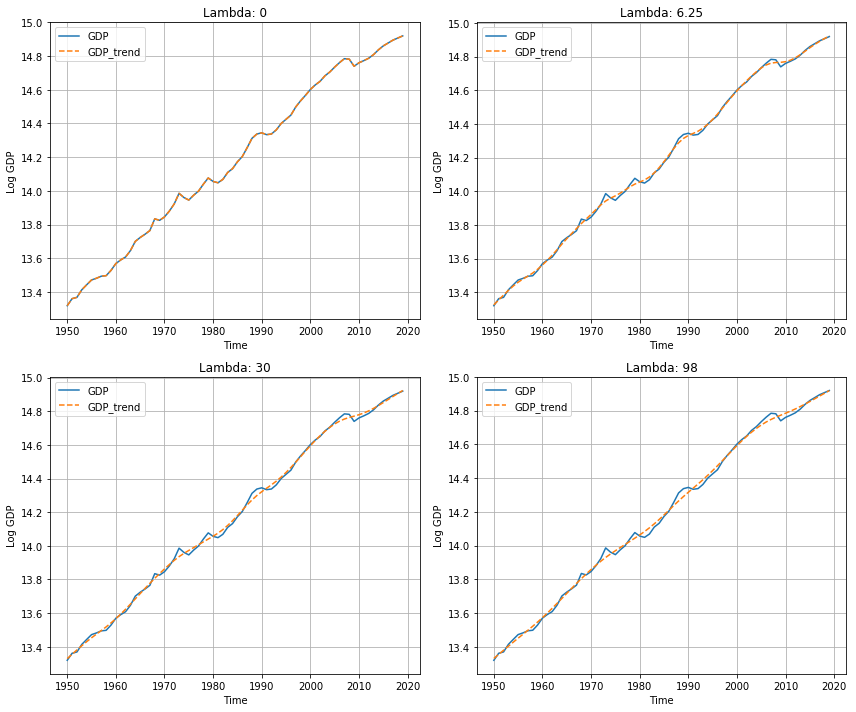

In [22]:
lambda_list = [0, 6.25, 30, 98]

fig, ax = plt.subplots(len(lambda_list)//2, 2, figsize=(12,10))
ax = ax.ravel()


ii = 0
for lambda_value in lambda_list:
    
    gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.rgdpna_log, lambda_value)
    ax[ii].plot(df.year, df.rgdpna_log, label='GDP')
    ax[ii].plot(df.year, gdp_trend, label='GDP_trend', linestyle = 'dashed')
    
    ax[ii].legend()
    ax[ii].set_xlabel('Time')
    ax[ii].set_ylabel('Log GDP')
    ax[ii].set_title('Lambda: {}'.format(lambda_value))
    ax[ii].grid()
    ii+=1
    
plt.tight_layout()
plt.show()

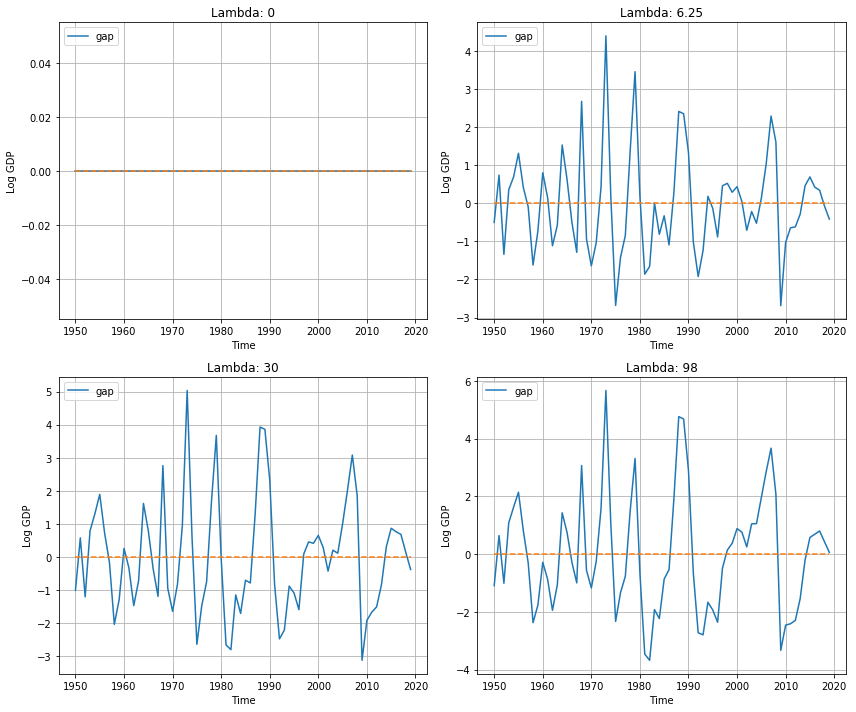

In [23]:
lambda_list =  [0, 6.25, 30, 98]

fig, ax = plt.subplots(len(lambda_list)//2, 2, figsize=(12,10))
ax = ax.ravel()

ii = 0
for lambda_value in lambda_list:
    
    gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.rgdpna_log, lambda_value)
    
    ax[ii].plot(df.year, (df.rgdpna_log - gdp_trend)*100, label='gap')
    ax[ii].plot(df.year, [0]*70,  linestyle = 'dashed')
    
    ax[ii].legend(loc = 'upper left')
    ax[ii].set_xlabel('Time')
    ax[ii].set_ylabel('Log GDP')
    ax[ii].set_title('Lambda: {}'.format(lambda_value))
    ax[ii].grid()
    ii+=1
    
plt.tight_layout()
plt.show()

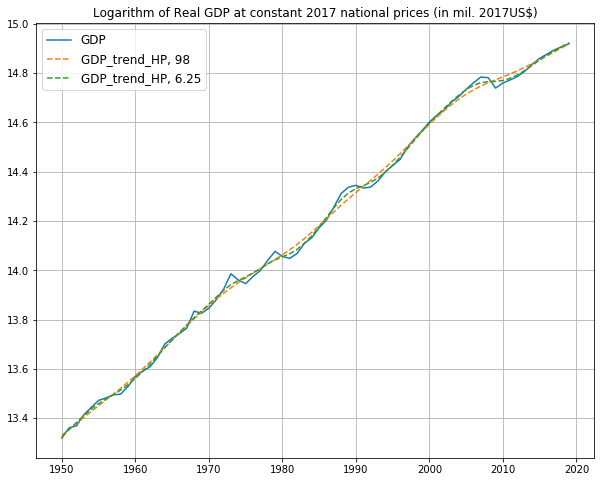

In [24]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df.year, df.rgdpna_log, label='GDP')
ax.plot(df.year, sm.tsa.filters.hpfilter(df.rgdpna_log, 98)[1], label='GDP_trend_HP, 98', linestyle = 'dashed')
ax.plot(df.year, sm.tsa.filters.hpfilter(df.rgdpna_log, 6.25)[1], label='GDP_trend_HP, 6.25', linestyle = 'dashed')


ax.grid()
ax.legend(fontsize = 12)
plt.title('Logarithm of Real GDP at constant 2017 national prices (in mil. 2017US$)')
plt.show()

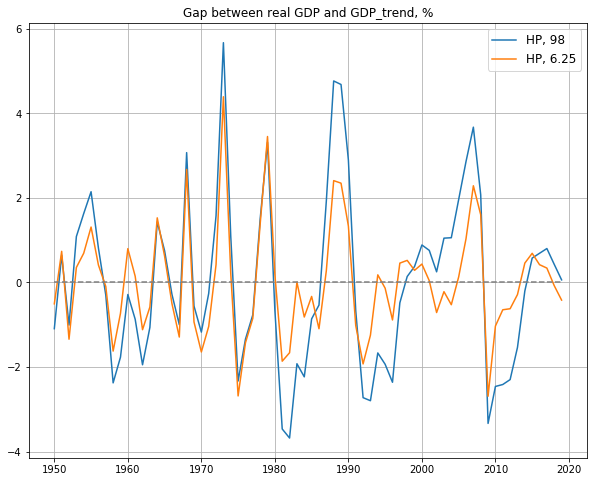

In [25]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df.year, sm.tsa.filters.hpfilter(df.rgdpna_log, 98)[0]*100, label='HP, 98')
ax.plot(df.year, sm.tsa.filters.hpfilter(df.rgdpna_log, 6.25)[0]*100, label='HP, 6.25')
ax.plot(df.year, [0]*70,  linestyle = 'dashed', color='grey')

ax.grid()
ax.legend(fontsize = 12)
plt.title('Gap between real GDP and GDP_trend, %')

plt.show()

## Baxter-King Filter

In [26]:
gdp_cycles_BK  = sm.tsa.filters.bkfilter(df.rgdpna_log, 2, 5, 3)

In [27]:
gdp_trend_BK = df.rgdpna_log - gdp_cycles_BK

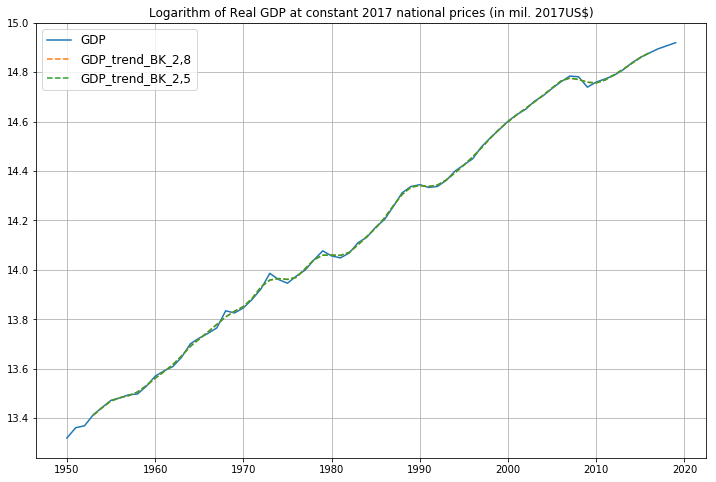

In [28]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df.year, df.rgdpna_log, label='GDP')
ax.plot(df.year, gdp_trend_BK, label='GDP_trend_BK_2,8', linestyle = 'dashed')
ax.plot(df.year, (df.rgdpna_log - sm.tsa.filters.bkfilter(df.rgdpna_log, 2, 5, 3)), label='GDP_trend_BK_2,5', linestyle = 'dashed')

ax.grid()
ax.legend(fontsize = 12)
plt.title('Logarithm of Real GDP at constant 2017 national prices (in mil. 2017US$)')

plt.show()

## Christiano Fitzgerald 

In [29]:
gdp_cycles_CF, gdp_trend_CF = sm.tsa.filters.cffilter(df.rgdpna_log, 2, 5, drift  = False)

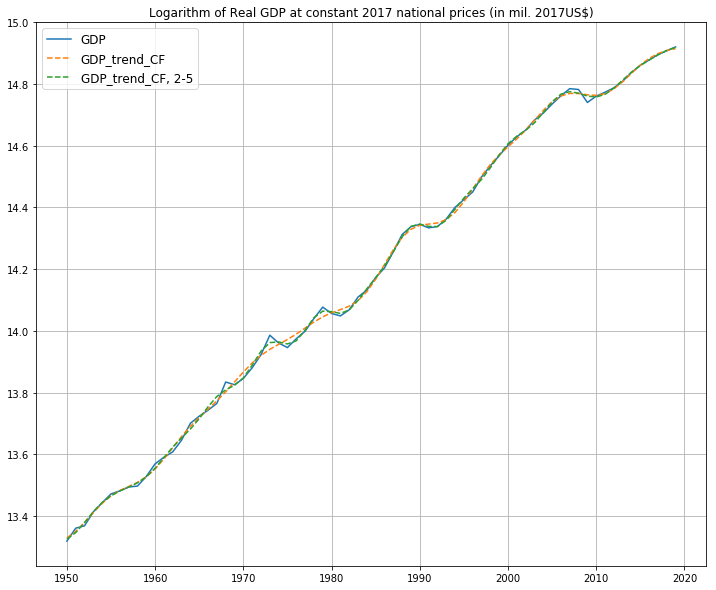

In [30]:
fig, ax = plt.subplots(figsize=(12,10))

ax.plot(df.year, df.rgdpna_log, label='GDP')
ax.plot(df.year, sm.tsa.filters.cffilter(df.rgdpna_log, 2, 8, drift  = False)[1], label='GDP_trend_CF', linestyle = 'dashed')
ax.plot(df.year, sm.tsa.filters.cffilter(df.rgdpna_log, 2, 5, drift  = False)[1], label='GDP_trend_CF, 2-5', linestyle = 'dashed')

ax.grid()
ax.legend(fontsize = 12)
plt.title('Logarithm of Real GDP at constant 2017 national prices (in mil. 2017US$)')
plt.show()

### Christiano Fitzgerald vs  Baxter-King Filter

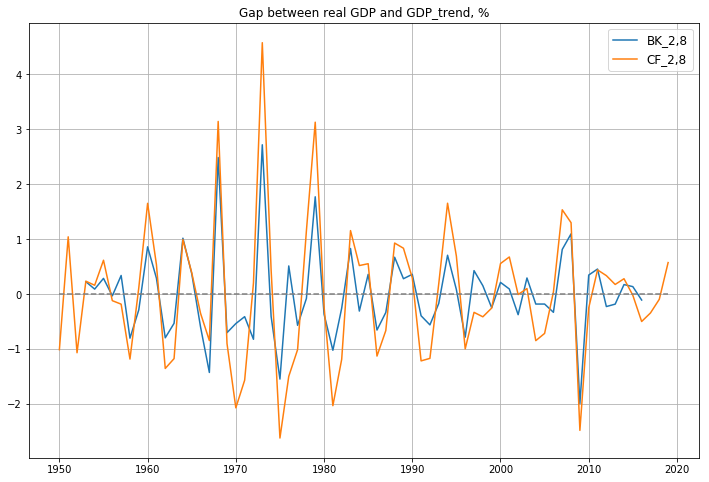

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df.year[3:67], gdp_cycles_BK*100, label='BK_2,8')
ax.plot(df.year, sm.tsa.filters.cffilter(df.rgdpna_log, 2, 8, drift  = False)[0]*100, label='CF_2,8')
ax.plot(df.year, [0]*70,  linestyle = 'dashed', color='grey')

ax.grid()
ax.legend(fontsize = 12)
plt.title('Gap between real GDP and GDP_trend, %')

plt.show()

## Сравнение фильтров

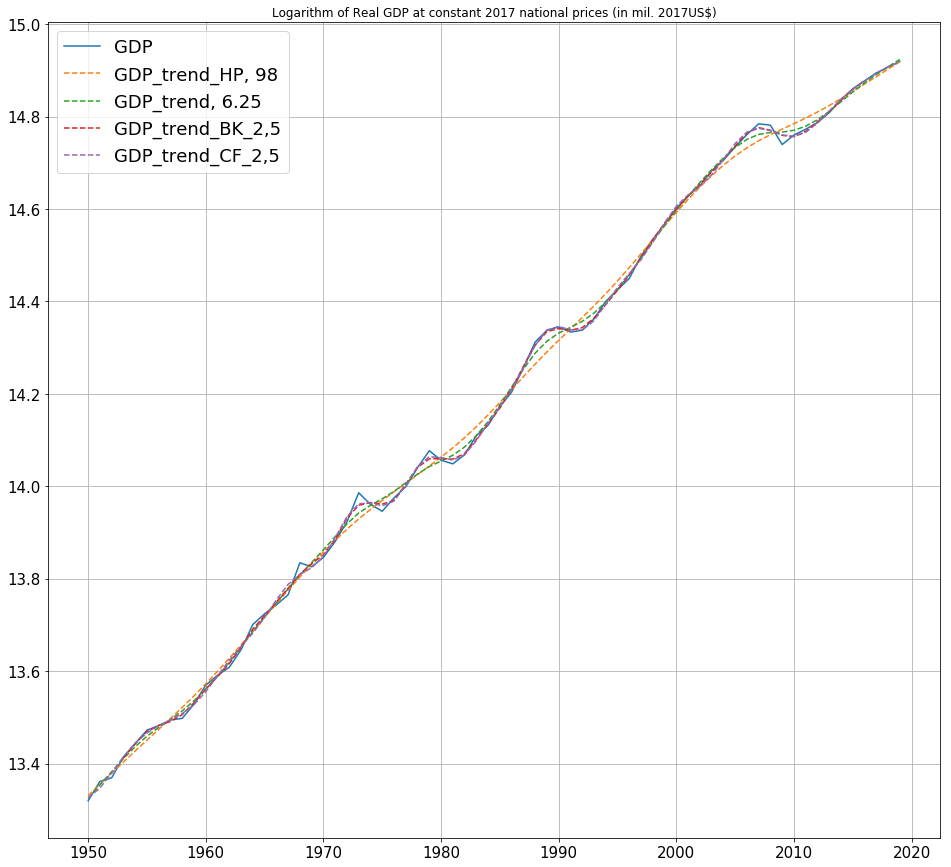

In [32]:
fig, ax = plt.subplots(figsize=(16,15))

ax.plot(df.year, df.rgdpna_log, label='GDP')
ax.plot(df.year, sm.tsa.filters.hpfilter(df.rgdpna_log, 98)[1], label='GDP_trend_HP, 98', linestyle = 'dashed')
ax.plot(df.year, sm.tsa.filters.hpfilter(df.rgdpna_log, 6.25)[1], label='GDP_trend, 6.25', linestyle = 'dashed')
ax.plot(df.year, gdp_trend_BK, label='GDP_trend_BK_2,5', linestyle = 'dashed')
ax.plot(df.year, gdp_trend_CF, label='GDP_trend_CF_2,5', linestyle = 'dashed')

ax.grid()
ax.tick_params(axis = 'both',   labelsize = 15) 
ax.legend(fontsize = 18)
plt.title('Logarithm of Real GDP at constant 2017 national prices (in mil. 2017US$)')
plt.show()

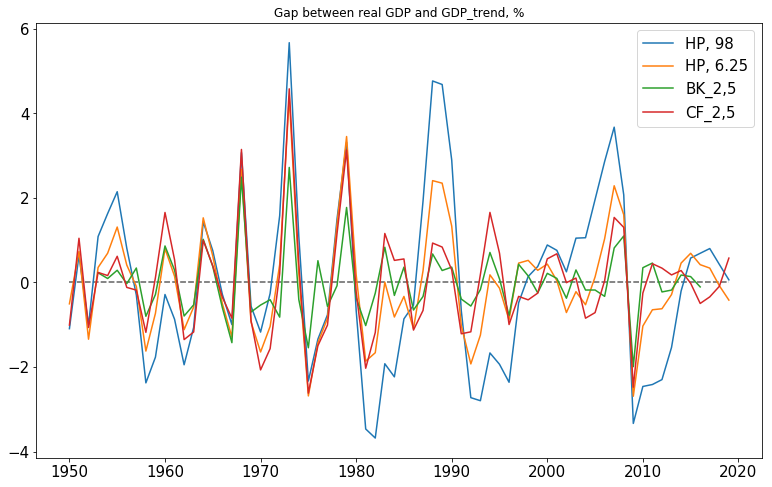

In [33]:
fig, ax = plt.subplots(figsize=(13,8))

ax.plot(df.year, [0]*70,  linestyle = 'dashed', color='grey')
ax.plot(df.year, [0]*70,  linestyle = 'dashed', color='grey')
ax.plot(df.year, sm.tsa.filters.hpfilter(df.rgdpna_log, 98)[0]*100, label='HP, 98')
ax.plot(df.year, sm.tsa.filters.hpfilter(df.rgdpna_log, 6.25)[0]*100, label='HP, 6.25')
ax.plot(df.year[3:67], gdp_cycles_BK*100, label='BK_2,5')
ax.plot(df.year, sm.tsa.filters.cffilter(df.rgdpna_log, 2, 8, drift  = False)[0]*100, label='CF_2,5')

ax.legend(fontsize = 15)
ax.tick_params(axis = 'both',   labelsize = 15) 
plt.title('Gap between real GDP and GDP_trend, %')
plt.show()

In [34]:
## Add potential output to dataframe

df['y_filter'] = sm.tsa.filters.cffilter(df.rgdpna_log, 2, 5, drift  = False)[1]

## Estimation of elasticities in Cobb–Douglas function and Solow residual

In [36]:
df['rnna_log'] = np.log(df['rnna']) 
df['emp_log'] = np.log(df['emp']) 
df.head()

,year,rgdpna,rnna,emp,rgdpna_log,y_filter,rnna_log,emp_log
0,1950,608973.1250,2162772.25,23.207903,13.319529,13.325739,14.586901,3.144493
1,1951,634964.1250,2307417.25,23.553173,13.361324,13.347044,14.651639,3.159261
2,1952,639937.0000,2397405.75,23.540199,13.369125,13.379685,14.689898,3.158710
3,1953,669456.3125,2506864.00,23.652960,13.414221,13.414825,14.734543,3.163488
4,1954,689354.3750,2620023.50,23.987253,13.443511,13.444469,14.778694,3.177523


In [37]:
y = (df.y_filter - df.y_filter.shift(periods=1))[1:]
X =pd.DataFrame({"log(Kt+1/Kt)": (df.rnna_log - df.rnna_log.shift(periods=1))[1:], 
                 "log(Lt+1/Lt)": (df.emp_log - df.emp_log.shift(periods=1))[1:]})
X = sm.add_constant(X)

In [41]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               y_filter   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     15.21
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           3.69e-06
Time:                        12:32:20   Log-Likelihood:                 208.14
No. Observations:                  69   AIC:                            -410.3
Df Residuals:                      66   BIC:                            -403.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0123      0.003      3.668   

In [59]:
results.params

const           0.012312
log(Kt+1/Kt)    0.275629
log(Lt+1/Lt)    0.575224
dtype: float64

In [60]:
print('Elasticity of capital is equal {alfa:.2%} and labour {beta:.2%}'.format(alfa = round(results.params[1], 3), beta = round(results.params[2], 3) ))
print('Solow residual {:.2%}'.format(results.params[0]))

Elasticity of capital is equal 27.60% and labour 57.50%
Solow residual 1.23%
